### **Import libraries and load dataset**

In [27]:
import numpy as np
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### **Extract data for classed 0, 1, 2 and preprocess them**

In [28]:
train_indices = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))
test_indices = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_test, y_test = x_test[test_indices], y_test[test_indices]

# Preprocess images (normalize)
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

### **Calculate HuMoments for dataset**

In [29]:
# Calculate Hu moments descriptors for each image
def calculate_hu_moments(images):
    hu_moments = []
    for image in images:
        moments = cv2.moments(image)
        hu = cv2.HuMoments(moments).flatten()
        hu_moments.append(hu)
    return np.array(hu_moments)

x_train_hu = calculate_hu_moments(x_train)
x_test_hu = calculate_hu_moments(x_test)

### **Convert class vectors to binary class matrices**

In [30]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

### **Create model and compile it**

In [31]:
# Define model
model = keras.Sequential([
    keras.layers.Input(shape=x_train_hu[0].shape),
    keras.layers.Flatten(),
    keras.layers.Dense(units=num_classes*80, activation='relu'),
    keras.layers.Dropout(0.5),  # Adding dropout
    keras.layers.Dense(units=num_classes, activation='softmax')
])

model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 7)                 0         
                                                                 
 dense_43 (Dense)            (None, 800)               6400      
                                                                 
 dropout_17 (Dropout)        (None, 800)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                8010      
                                                                 
Total params: 14410 (56.29 KB)
Trainable params: 14410 (56.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Train model on training data**

In [32]:
# Train model
history = model.fit(x_train_hu, y_train_cat,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test_hu, y_test_cat),
                    shuffle=True)

Epoch 1/20
187/187 [==============================] - 1s 4ms/step - loss: 1.0183 - accuracy: 0.5968 - val_loss: 0.6596 - val_accuracy: 0.7385
Epoch 2/20
187/187 [==============================] - 1s 3ms/step - loss: 0.5830 - accuracy: 0.7479 - val_loss: 0.5320 - val_accuracy: 0.8100
Epoch 3/20
187/187 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.8052 - val_loss: 0.4528 - val_accuracy: 0.8116
Epoch 4/20
187/187 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.8437
Epoch 5/20
187/187 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8611 - val_loss: 0.3619 - val_accuracy: 0.8630
Epoch 6/20
187/187 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8789 - val_loss: 0.3327 - val_accuracy: 0.8818
Epoch 7/20
187/187 [==============================] - 1s 3ms/step - loss: 0.3301 - accuracy: 0.8891 - val_loss: 0.3149 - val_accuracy: 0.9078
Epoch 

### **Evaluate model on the test set**

In [33]:
# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(x_test_hu, y_test_cat)
print(f'Test Accuracy: {test_accuracy:.4f}')

99/99 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9225
Test Accuracy: 0.9225


### **Show 30 images with predictions of the model**

99/99 [==============================] - 0s 1ms/step


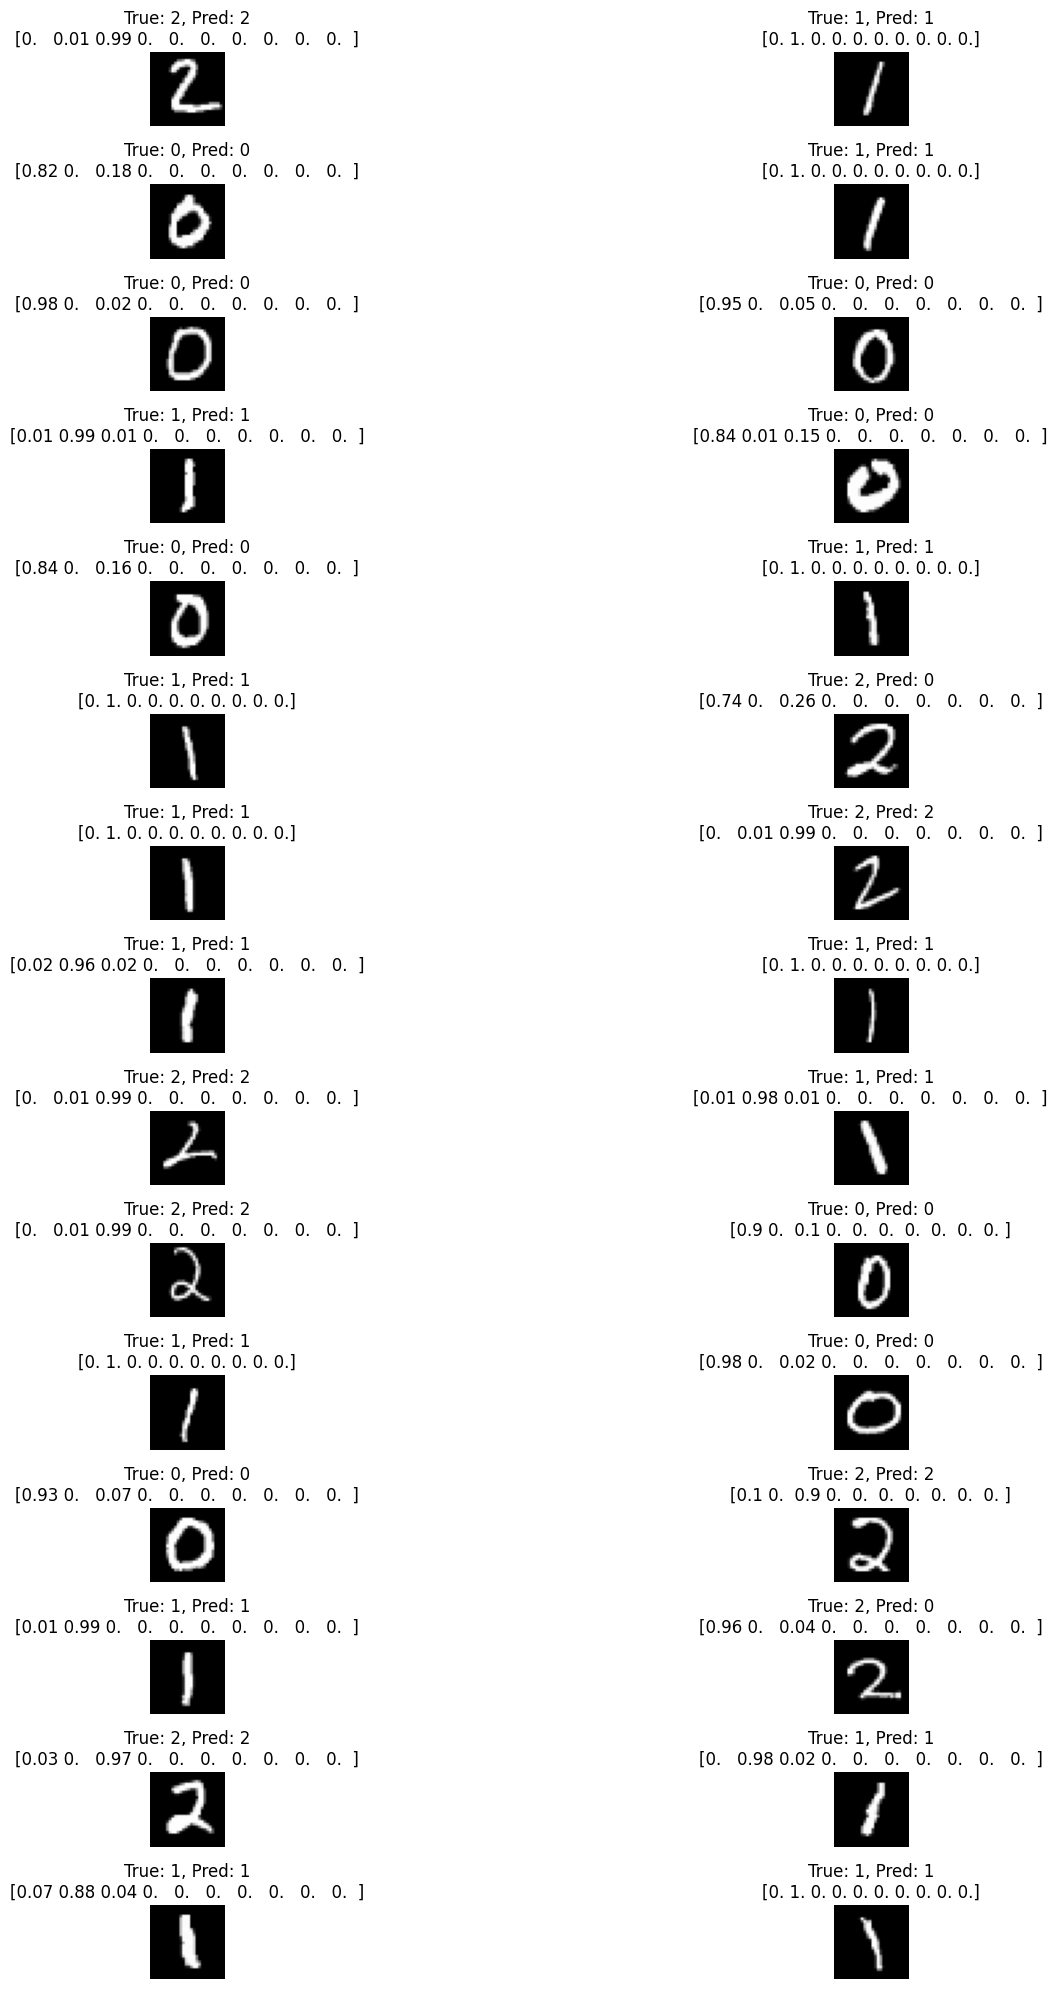

In [34]:
# Predict labels for test images
y_pred = model.predict(x_test_hu)

# Show 100 predictions with prediction vector
plt.figure(figsize=(20, 20))
count = 0
for i in range(len(x_test)):
    if count >= 30:
        break
    plt.subplot(15, 2, count + 1)
    plt.imshow(x_test[i], cmap='gray')
    pred_vector = np.round(y_pred[i], 2)
    plt.title(f'True: {np.argmax(y_test_cat[i])}, Pred: {np.argmax(y_pred[i])}\n{pred_vector}')
    plt.axis('off')
    count += 1

plt.tight_layout()
plt.show()